In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
steam_games = pd.read_csv('CSV\steam_games.csv')


In [3]:
print(f'El dataframe de steam_games tiene {steam_games.shape[0]} filas')
print(f'El dataframe de steam_games tiene {steam_games.shape[1]} columnas')


El dataframe de steam_games tiene 32135 filas
El dataframe de steam_games tiene 9 columnas


In [4]:
porcentaje_nulos = round(steam_games.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

genres           0.433%
app_name         0.006%
tags             0.507%
specs            2.085%
price            4.285%
early_access       0.0%
id               0.006%
developer       10.132%
release_year     7.319%
dtype: object


In [5]:
# Verificar la cantidad de datos duplicados
duplicados = steam_games.duplicated().sum()
print(f"Cantidad de datos duplicados en steam_games: {duplicados}")

Cantidad de datos duplicados en steam_games: 1


In [6]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = steam_games.dtypes
print("\nTipos de datos en steam_games:")
print(tipos_de_datos)


Tipos de datos en steam_games:
genres           object
app_name         object
tags             object
specs            object
price           float64
early_access    float64
id              float64
developer        object
release_year    float64
dtype: object


In [7]:
steam_games.head()

,genres,app_name,tags,specs,price,early_access,id,developer,release_year
0,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",Lost Summoner Kitty,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,0.0,761140.0,Kotoshiro,2018.0
1,"['Free to Play', 'Strategy', 'Indie', 'RPG']",Ironbound,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,643980.0,Secret Level SRL,2018.0
2,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Real Pool 3D - Poolians,"['Free to Play', 'Simulation', 'Sports', 'Casu...","['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,670290.0,Poolians.com,2017.0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,"['Action', 'Adventure', 'Casual']",['Single-player'],0.99,0.0,767400.0,彼岸领域,2017.0
4,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']","['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN


In [8]:
round(steam_games.drop(columns=['id','early_access'],axis=1).describe(),3)


,price,release_year
count,30758.000,29783.000
mean,8.898,2014.759
std,16.341,3.508
min,0.000,1970.000
25%,2.990,2014.000
50%,4.990,2016.000
75%,9.990,2017.000
max,995.000,2021.000


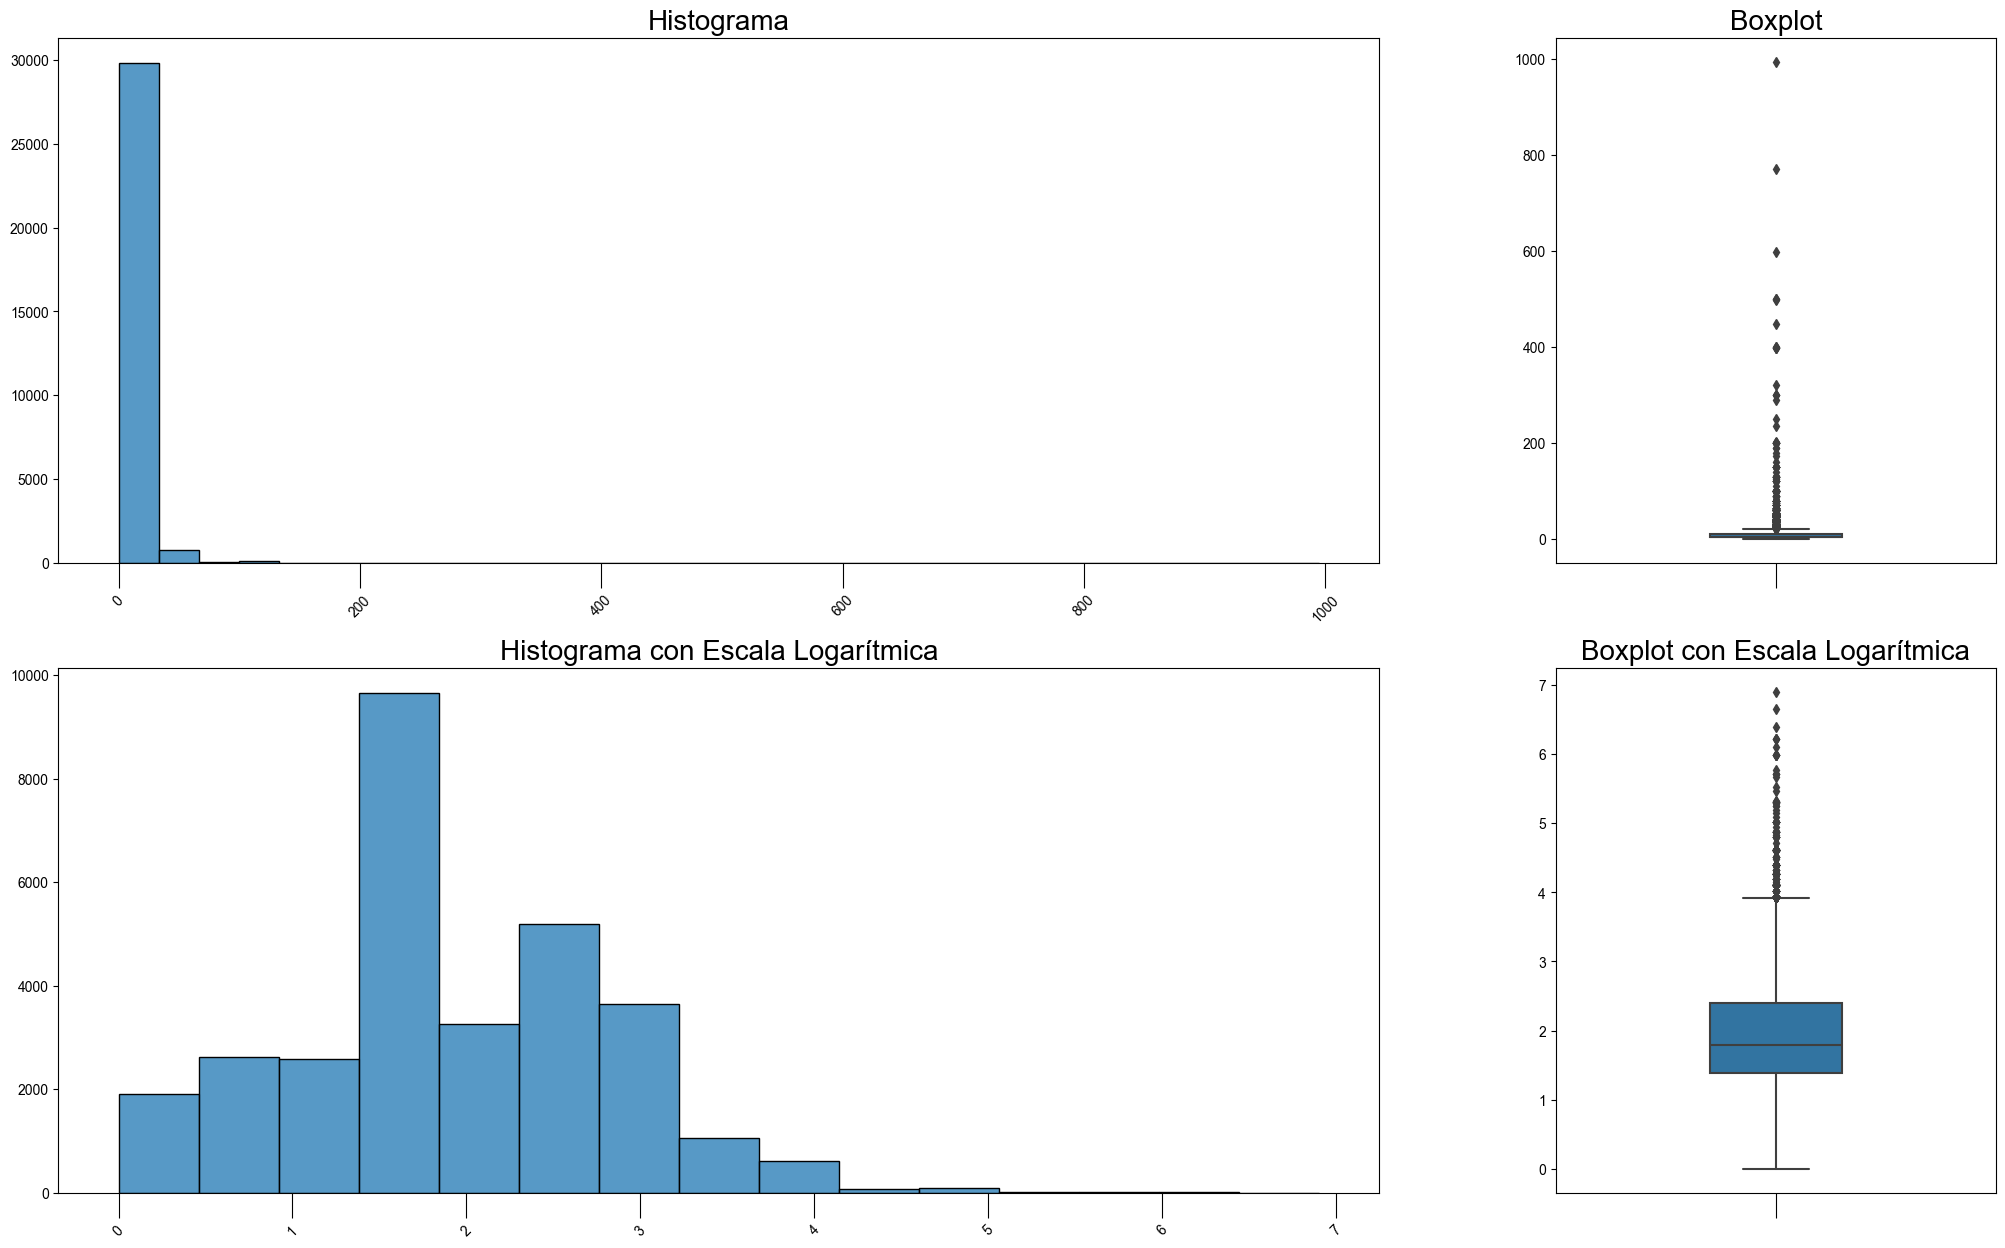

In [9]:
# Crear un lienzo con cuatro gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15), gridspec_kw={'width_ratios': [3, 1]})
sns.set_style("ticks")

# Histograma original
sns.histplot(steam_games['price'], bins=30, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Histograma',fontsize = 20)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# Boxplot original
sns.boxplot(y=steam_games['price'], ax=axes[0, 1], width=0.3)
axes[0, 1].set_title('Boxplot',fontsize = 20)
axes[0, 1].set_ylabel('')

# Histograma con escala logarítmica
sns.histplot(np.log1p(steam_games['price']), bins=15, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Histograma con Escala Logarítmica',fontsize = 20)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# Boxplot con escala logarítmica
sns.boxplot(y=np.log1p(steam_games['price']), ax=axes[1, 1], width=0.3)
axes[1, 1].set_title('Boxplot con Escala Logarítmica',fontsize = 20)
axes[1, 1].set_ylabel('')

# Añadir estilo a los ticks
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45,size=18)

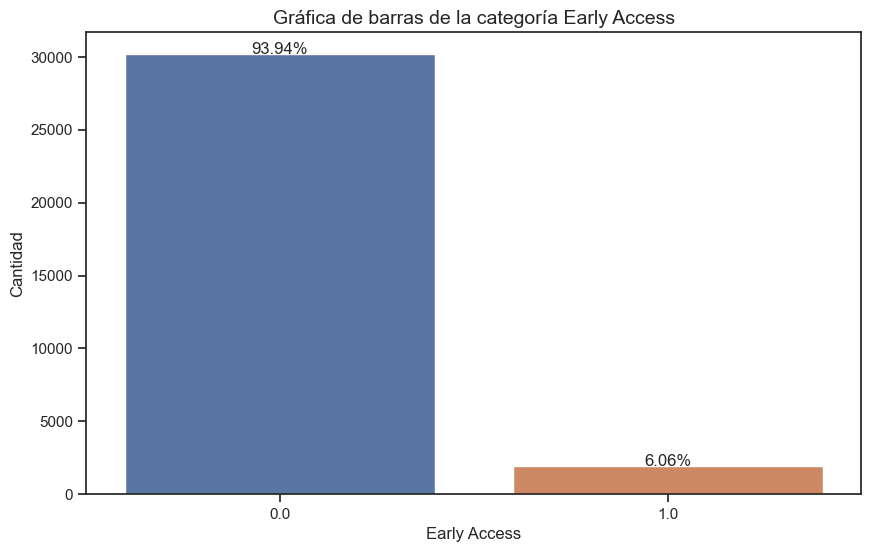

In [10]:
# Configurar el lienzo con un solo gráfico
sns.set(style="ticks")
plt.figure(figsize=(10, 6))

# Gráfica de barras para 'early_access'
sns.countplot(x='early_access', data=steam_games)
plt.title('Gráfica de barras de la categoría Early Access',fontsize = 14)
plt.xlabel('Early Access')
plt.ylabel('Cantidad')

# Agregar etiquetas con porcentaje
total_samples_early_access = len(steam_games['early_access'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.1,
                   f'{height / total_samples_early_access:.2%}',
                   ha="center")

# Mostrar la gráfica
plt.show()

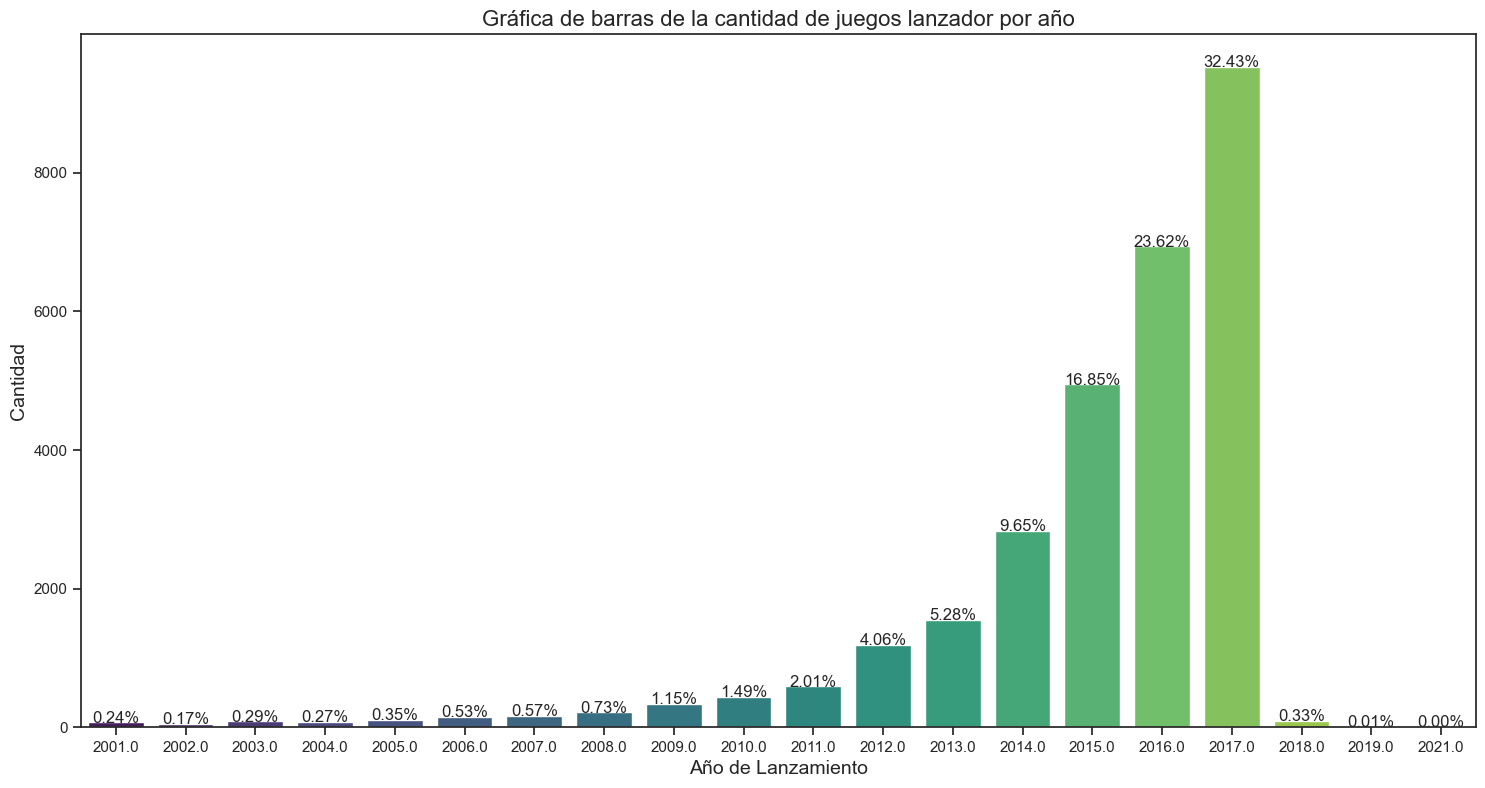

In [11]:
steam_games_filtered = steam_games[steam_games['release_year'] > 2000]

# Configurar el lienzo con un solo gráfico de barras
plt.figure(figsize=(18, 9))

# Gráfica de barras para 'release_year'
ax = sns.countplot(x='release_year', data=steam_games_filtered, palette='viridis')

# Añadir etiquetas con porcentaje
total_samples = len(steam_games_filtered['release_year'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height / total_samples:.2%}',
            ha="center")

plt.title('Gráfica de barras de la cantidad de juegos lanzador por año', fontsize = 16)
plt.xlabel('Año de Lanzamiento',fontsize = 14)
plt.ylabel('Cantidad',fontsize = 14)

# Mostrar la gráfica
plt.show()

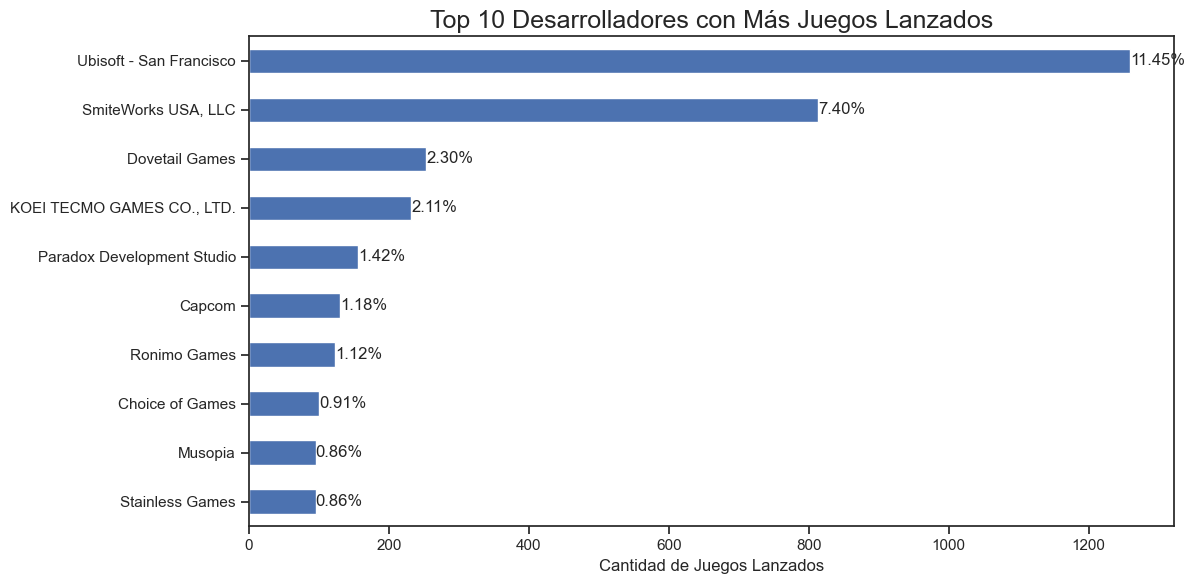

In [12]:
# Contar la cantidad de juegos por cada desarrollador
top_developers = steam_games['developer'].value_counts().head(10)

# Calcular porcentajes
percentages = (top_developers / len(steam_games['developer'].unique())) * 100

# Crear un gráfico de 
plt.figure(figsize=(12, 6))
ax = top_developers.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Desarrolladores con Más Juegos Lanzados',fontsize=18)
plt.xlabel('Cantidad de Juegos Lanzados')
plt.ylabel('')
plt.tight_layout()

# Agregar etiquetas con porcentajes
for i, (developer, percentage) in enumerate(zip(top_developers.index[::-1], percentages[::-1])):
    ax.text(top_developers[developer], i, f'{percentage:.2f}%', va='center')

plt.show()

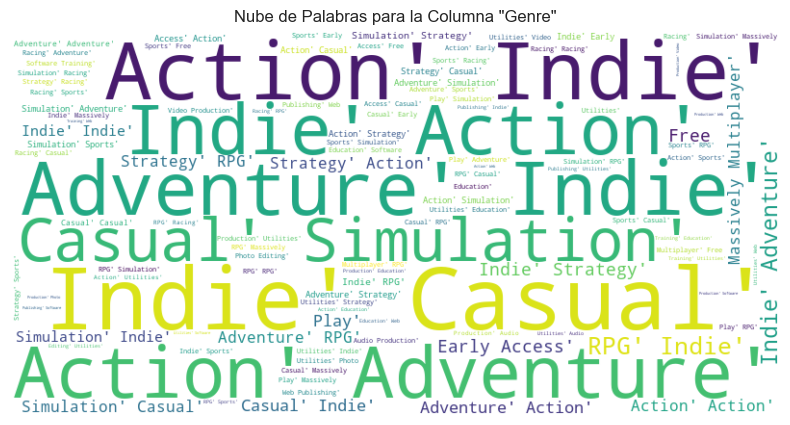

In [13]:
# Crear un string concatenando todos los valores de la columna 'genre'
genres_text = ' '.join(steam_games['genres'].dropna())

# Configurar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "Genre"')
plt.show()

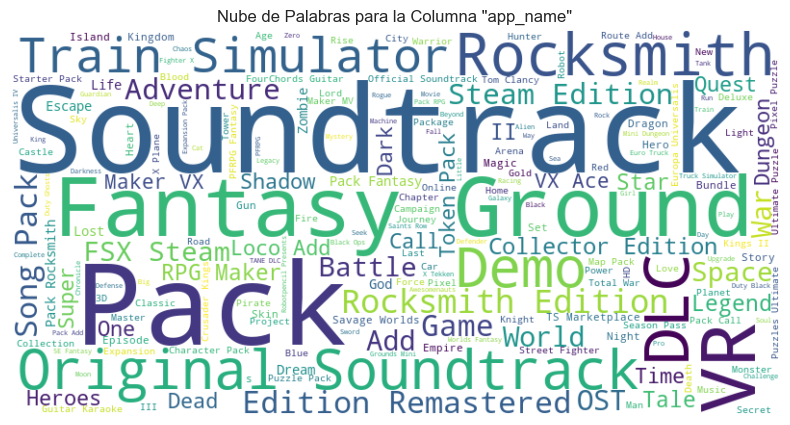

In [14]:
# Crear un string concatenando todos los valores de la columna 'app_name'
app_names_text = ' '.join(steam_games['app_name'].dropna())

# Configurar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(app_names_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "app_name"')
plt.show()

In [17]:
user_items =pd.read_csv(r'CSV\user_items.csv')


In [18]:
print(f'El dataframe de user_items tiene {user_items.shape[0]} filas')
print(f'El dataframe de user_items tiene {user_items.shape[1]} columnas')

El dataframe de user_items tiene 5094105 filas
El dataframe de user_items tiene 5 columnas


In [19]:
porcentaje_nulos = round(user_items.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

user_id             0.0%
items_count         0.0%
item_id             0.0%
item_name           0.0%
playtime_forever    0.0%
dtype: object


In [20]:
# Verificar la cantidad de datos duplicados
duplicados = user_items.duplicated().sum()
print(f"Cantidad de datos duplicados en user_items: {duplicados}")

Cantidad de datos duplicados en user_items: 13


In [21]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = user_items.dtypes
print("\nTipos de datos en user_items:")
print(tipos_de_datos)


Tipos de datos en user_items:
user_id             object
items_count          int64
item_id              int64
item_name           object
playtime_forever     int64
dtype: object


In [22]:
user_items.head()

,user_id,items_count,item_id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6
1,76561197970982479,277,20,Team Fortress Classic,0
2,76561197970982479,277,30,Day of Defeat,7
3,76561197970982479,277,40,Deathmatch Classic,0
4,76561197970982479,277,50,Half-Life: Opposing Force,0


In [23]:
user_items.drop(columns=['user_id', 'item_id']).describe()


,items_count,playtime_forever
count,5.094105e+06,5.094105e+06
mean,3.157324e+02,9.905511e+02
std,6.969073e+02,5.414297e+03
min,1.000000e+00,0.000000e+00
25%,7.100000e+01,0.000000e+00
50%,1.370000e+02,3.400000e+01
75%,2.750000e+02,3.550000e+02
max,7.762000e+03,6.427730e+05


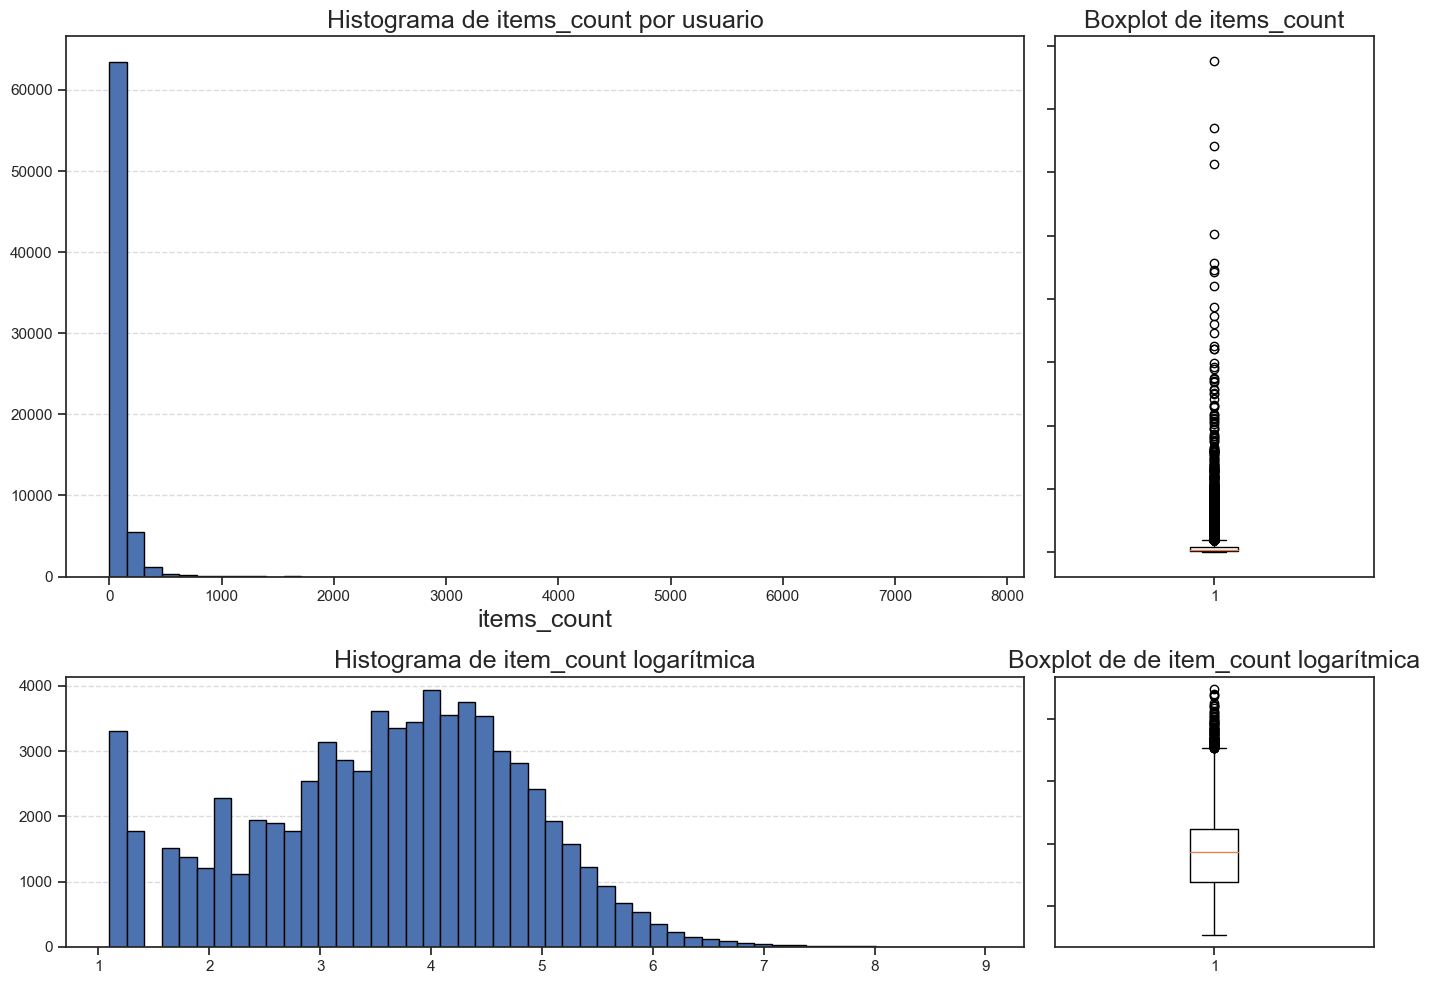

In [24]:
# Tomar el primer valor de items_count para cada usuario porque se repiten.
df_primer_valor_items = user_items.groupby('user_id')['items_count'].first().reset_index()

# Aplicar transformación logarítmica , sumamos 1 por los valores que son 0
df_primer_valor_items['log_items_count'] = np.log1p(df_primer_valor_items['items_count'] + 1)

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [2, 1]})

# Histograma de items_count por usuario 
axes[0, 0].hist(df_primer_valor_items['items_count'], bins=50, edgecolor='black')
axes[0, 0].set_title('Histograma de items_count por usuario', fontsize=18)
axes[0, 0].set_xlabel('items_count', fontsize=18)
axes[0, 0].set_ylabel('')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de items_count
axes[0, 1].boxplot(df_primer_valor_items['items_count'], vert=True)
axes[0, 1].set_title('Boxplot de items_count', fontsize=18)
axes[0, 1].set_yticklabels([])
axes[0, 1].set_xlabel('')

# Histograma de datos después de la transformación logarítmica
axes[1, 0].hist(df_primer_valor_items['log_items_count'], bins=50, edgecolor='black')
axes[1, 0].set_title('Histograma de item_count logarítmica', fontsize=18)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de log_items_count (transformación logarítmica)
axes[1, 1].boxplot(df_primer_valor_items['log_items_count'], vert=True)
axes[1, 1].set_title('Boxplot de de item_count logarítmica', fontsize=18)
axes[1, 1].set_yticklabels([])
axes[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()

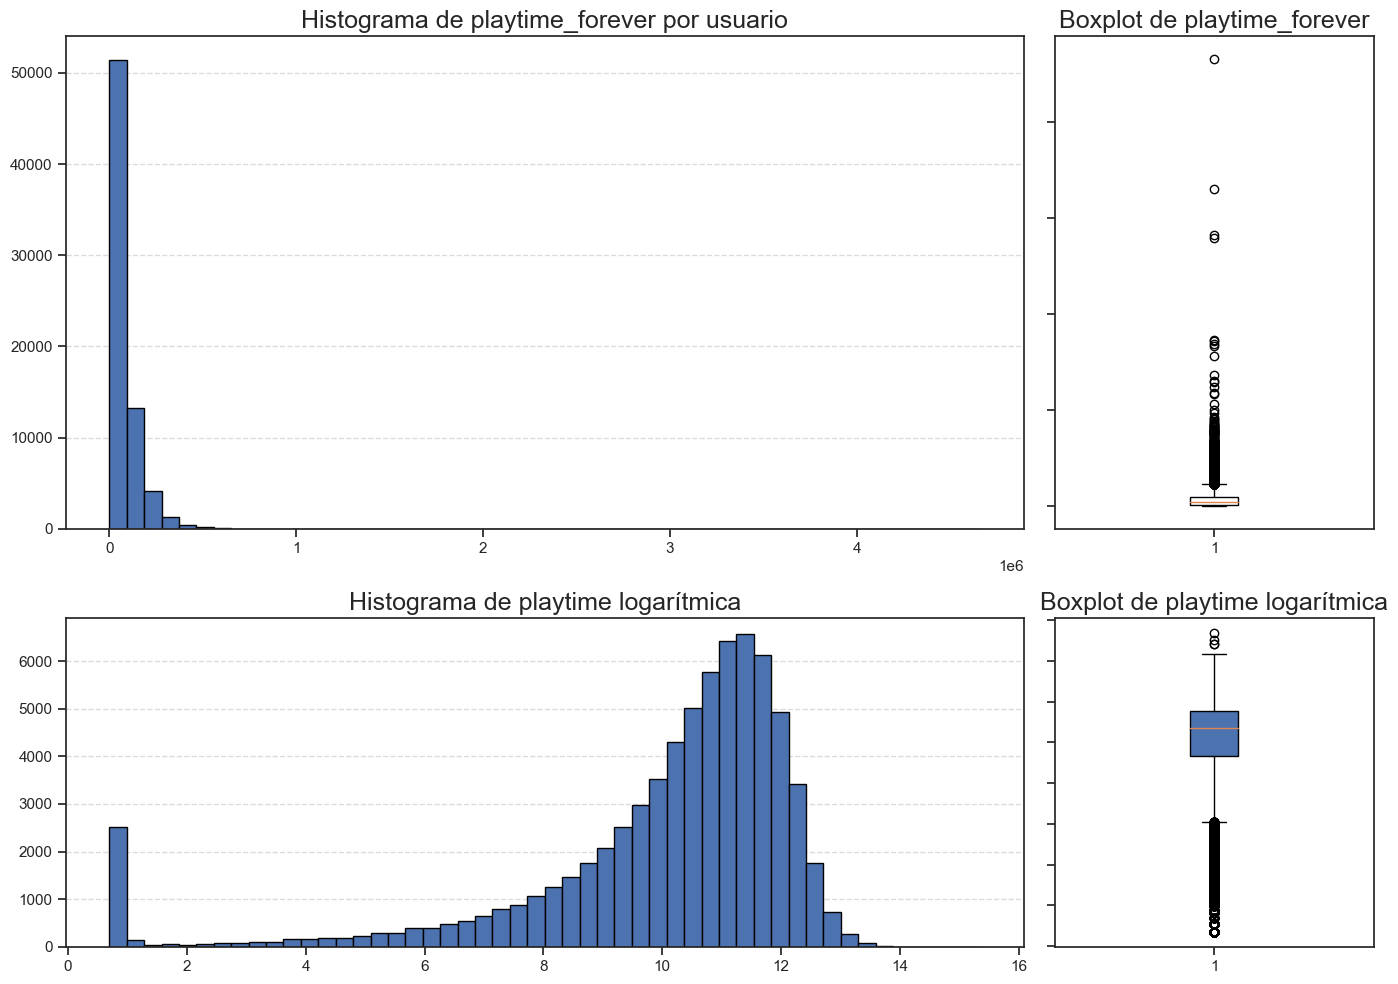

In [25]:
# Agregar la columna de suma de playtime_forever por usuario
df_agg = user_items.groupby('user_id')['playtime_forever'].sum().reset_index()

# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1.5, 1]})

# Histograma de datos originales
axs[0, 0].hist(df_agg['playtime_forever'], bins=50, edgecolor='black')
axs[0, 0].set_title('Histograma de playtime_forever por usuario',fontsize =18)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('')
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de datos originales
axs[0, 1].boxplot(df_agg['playtime_forever'], vert=True)
axs[0, 1].set_title('Boxplot de playtime_forever',fontsize =18)
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlabel('')

# Aplicar la transformación logarítmica a la columna playtime_forever
df_agg['playtime_log'] = np.log1p(df_agg['playtime_forever']+1)

# Histograma de datos transformados
axs[1, 0].hist(df_agg['playtime_log'], bins=50, edgecolor='black')
axs[1, 0].set_title('Histograma de playtime logarítmica',fontsize =18)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('')
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot de datos transformados
axs[1, 1].boxplot(df_agg['playtime_log'], vert=True, patch_artist=True, boxprops=dict())
axs[1, 1].set_title('Boxplot de playtime logarítmica',fontsize =18)
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()

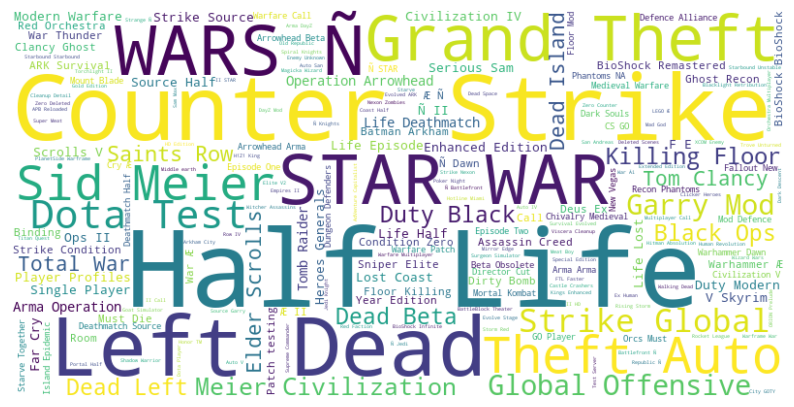

In [26]:
# Concatenar todos los nombres de los elementos en una sola cadena
text = ' '.join(user_items['item_name'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Mostrar la nube de palabras usando Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [28]:
user_reviews = pd.read_csv(r'CSV\user_reviews.csv')


In [29]:
print(f'El dataframe de user_reviews tiene {user_reviews.shape[0]} filas')
print(f'El dataframe de user_reviews tiene {user_reviews.shape[1]} columnas')


El dataframe de user_reviews tiene 58431 filas
El dataframe de user_reviews tiene 6 columnas


In [30]:
porcentaje_nulos = round(user_reviews.isnull().mean() * 100, 3)
porcentaje_nulos = porcentaje_nulos.astype(str) + '%'
print(porcentaje_nulos)

user_id                0.0%
item_id                0.0%
recommend              0.0%
posted_year           17.0%
sentiment_score        0.0%
sentiment_analysis     0.0%
dtype: object


In [31]:
# Verificar la cantidad de datos duplicados
duplicados = user_reviews.duplicated().sum()
print(f"Cantidad de datos duplicados en user_reviews: {duplicados}")

Cantidad de datos duplicados en user_reviews: 0


In [32]:
# Obtener los tipos de datos de cada columna
tipos_de_datos = user_items.dtypes
print("\nTipos de datos en user_items:")
print(tipos_de_datos)


Tipos de datos en user_items:
user_id             object
items_count          int64
item_id              int64
item_name           object
playtime_forever     int64
dtype: object


In [33]:
user_reviews.drop(columns=['item_id','sentiment_score'],axis=1).describe()


,posted_year,sentiment_analysis
count,48498.000000,58431.000000
mean,2014.148150,1.468826
std,0.842611,0.757426
min,2010.000000,0.000000
25%,2014.000000,1.000000
50%,2014.000000,2.000000
75%,2015.000000,2.000000
max,2015.000000,2.000000


In [34]:
user_reviews.head()


,user_id,item_id,recommend,posted_year,sentiment_score,sentiment_analysis
0,76561197970982479,1250,True,2011.0,0.8481,2
1,76561197970982479,22200,True,2011.0,0.2263,2
2,76561197970982479,43110,True,2011.0,0.9117,2
3,js41637,251610,True,2014.0,0.9566,2
4,js41637,227300,True,2013.0,0.9708,2


Text(0.5, 1.0, 'Análisis de Sentimientos por Año')

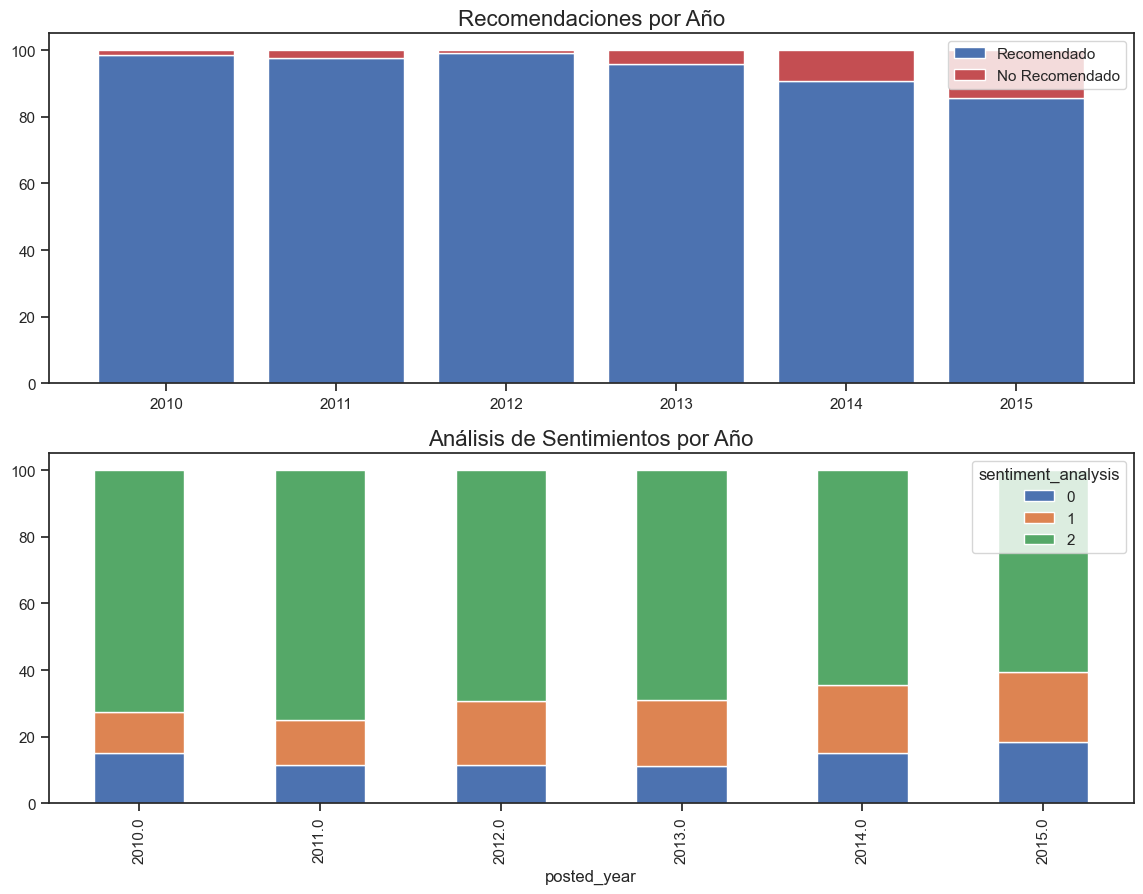

In [35]:
# Calcular los totales por año
total = user_reviews.groupby('posted_year').size().reset_index(name='total')

# Calcular la cantidad de recomendaciones True y False por año
recomendaciones_verdaderas = user_reviews[user_reviews['recommend'] == True].groupby('posted_year').size().reset_index(name='recomendaciones_verdaderas')
recomendaciones_falsas = user_reviews[user_reviews['recommend'] == False].groupby('posted_year').size().reset_index(name='recomendaciones_falsas')

# Unir los DataFrames
df_recomendaciones = total.merge(recomendaciones_verdaderas, on='posted_year').merge(recomendaciones_falsas, on='posted_year')

# Calcular los porcentajes
df_recomendaciones['recomendaciones_verdaderas_pct'] = df_recomendaciones['recomendaciones_verdaderas'] / df_recomendaciones['total'] * 100
df_recomendaciones['recomendaciones_falsas_pct'] = df_recomendaciones['recomendaciones_falsas'] / df_recomendaciones['total'] * 100

# Calcular la cantidad de cada tipo de análisis de sentimientos por año
recuento_sentimientos = user_reviews.groupby(['posted_year', 'sentiment_analysis']).size().unstack(fill_value=0)

# Calcular los porcentajes
df_sentimientos = recuento_sentimientos.div(recuento_sentimientos.sum(axis=1), axis=0) * 100

fig, axs = plt.subplots(2, 1, figsize=(14, 10))  

# Crear las barras para las recomendaciones True y False
barras_recomendaciones_verdaderas = axs[0].bar(df_recomendaciones['posted_year'], df_recomendaciones['recomendaciones_verdaderas_pct'], color='b', label='Recomendado')
barras_recomendaciones_falsas = axs[0].bar(df_recomendaciones['posted_year'], df_recomendaciones['recomendaciones_falsas_pct'], bottom=df_recomendaciones['recomendaciones_verdaderas_pct'], color='r', label='No Recomendado')
axs[0].set_title('Recomendaciones por Año',fontsize = 16)
axs[0].legend()

# Crear las barras para cada tipo de análisis de sentimientos y cambiar las etiquetas del eje y
barras_sentimientos = df_sentimientos.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Análisis de Sentimientos por Año',fontsize = 16)